### Task 1

1. Time Period:
    * Before COVID: July'19 - December'19
    * During COVID: January'20 - June'20
2. Indian Bank
    * 12 Public Banks
    * 18 Private Banks

### Import Libraries

In [1]:
import os, sys, time, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as get_data
%matplotlib inline

### Define Functions

In [2]:
# Define slope of linear regression
def beta(x,y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    S_xy = np.sum((x-x_bar)*(y-y_bar))
    S_xx = np.sum((x-x_bar)**2)
    return S_xy/S_xx

# Define MES measure (Minimum Expected Shortfall)
def mes(x,y):
    '''
    Input:
        x = individual returns
        y = Nifty50 returns
    ouput:
        -mean(returns of x at 5% worst Nifty returned cases)
    '''
    n = int(np.round(0.05*len(y),0))
    idx = np.argsort(y)[:n].tolist()
    required_arr = [x[i] for i in idx]
    return -np.mean(required_arr)

### Getting Information of Indian Banks

In [3]:
# load the bank details csv file
bank_details = pd.read_csv('./../data/bank_details.csv', encoding='latin')
# bank_details.dropna(subset = ['Symbol'], inplace = True)
bank_details.head()

,Sr. No,Name of the Bank,Branches,Establishment,Headquarter,Symbol,Type
0,1,Axis Bank,4528,1993,"Mumbai, Maharashtra",AXISBANK.NS,Private
1,2,Bandhan Bank,670+,2015,"Kolkata, West Bengal",BANDHANBNK.NS,Private
2,3,City Union Bank,700+,1904,"Kumbakonam, Tamil Nadu",CUB.NS,Private
3,4,D C B Bank,334,1930,"Mumbai, Maharashtra",DCBBANK.NS,Private
4,5,Dhanlaxmi Bank,270+,1927,"Thrissur city, Kerala",DHANBANK.NS,Private


In [4]:
# Collecting symbols for private and public banks
public_banks_symbol = bank_details[bank_details.Type == 'Public']['Symbol']
private_banks_symbol = bank_details[bank_details.Type == 'Private']['Symbol']
nifty50_symbol = '^NSEI'
print('Total number of public bank is ', len(public_banks_symbol))
print('Total number of private bank is ', len(private_banks_symbol))

Total number of public bank is  12
Total number of private bank is  18


### Define dates

In [5]:
# Fixing the date (before COVID)
b_start_date = '2019-07-01'
b_end_date = '2019-12-31'
# Fixing the date (during COVID)
a_start_date = '2020-01-01'
a_end_date = '2020-06-30'

## Before Covid Outbreak

### Nifty50

In [6]:
# Getting data for Nifty50 returns
nifty50_b = get_data.DataReader(nifty50_symbol, 'yahoo', start = b_start_date, end = b_end_date, pause = 10)
nifty50_b.reset_index(drop = True, inplace = True)
nifty50_b = nifty50_b['Close']
nifty50_return_b = nifty50_b.pct_change().drop(index = 0)

### Public Bank

In [7]:
# Collecting data for public banks
public_bank_b = get_data.DataReader(public_banks_symbol, 'yahoo', start = b_start_date, end = b_end_date, pause = 10)
public_bank_b = public_bank_b['Close']
public_bank_b.reset_index(drop = True, inplace = True)
public_bank_return_b = public_bank_b.pct_change().drop(index = 0)
public_bank_return_b.head()

Symbols,SBIN.NS,PNB.NS,BANKBARODA.BO,BANKINDIA.NS,MAHABANK.BO,UNIONBANK.NS,CANBK.NS,CENTRALBK.NS,INDIANB.NS,IOB.NS,PSB.NS,UCOBANK.NS
1,0.008159,-0.006184,-0.004950,-0.005513,-0.018868,-0.010778,-0.007710,-0.002410,-0.008304,-0.012397,-0.018762,-0.002755
2,0.004527,0.011201,0.040216,0.025499,0.025641,0.013923,0.016246,0.002415,0.007984,0.016736,0.001912,0.027624
3,0.003414,0.009846,0.031487,0.021622,0.031250,0.013134,-0.002085,0.000000,0.005216,0.041152,0.028626,0.043011
4,0.008846,-0.003047,0.007728,-0.005820,0.006061,-0.008839,0.013930,0.002410,-0.012877,0.007905,-0.016698,0.010309
5,-0.041414,-0.110024,-0.044862,-0.101118,-0.030120,-0.083829,-0.072815,-0.038462,-0.059774,-0.043137,-0.032075,-0.005102


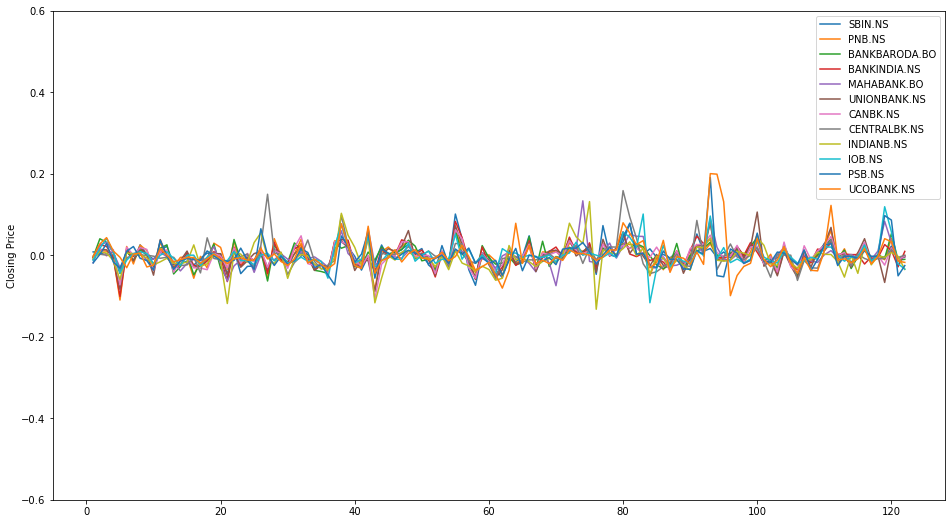

In [8]:
plt.figure(figsize = (16,9))
for ticker in public_bank_b.columns.values:
    plt.plot(public_bank_return_b.index, public_bank_return_b[ticker], label = ticker)
plt.ylabel('Closing Price')
plt.ylim(-0.6,0.6)
plt.legend();

In [9]:
beta_coef = []
MES = []
for ticker in public_bank_return_b.columns.tolist():
    beta_coef.append(beta(nifty50_return_b, public_bank_return_b[ticker]))
    MES.append(mes(public_bank_return_b[ticker], nifty50_return_b))
public_b = {'Symbol':public_bank_return_b.columns.tolist(), 
            'Bank':bank_details[bank_details.Type == 'Public']['Name of the Bank'].tolist(),
            'Type':['Public' for i in range(public_bank_return_b.shape[1])],'Beta':beta_coef, 'MES':MES}
public_b = pd.DataFrame(public_b)
public_b

,Symbol,Bank,Type,Beta,MES
0,SBIN.NS,State bank of India,Public,1.686743,0.012236
1,PNB.NS,Punjab National Bank,Public,1.546418,0.010735
2,BANKBARODA.BO,Bank of Baroda,Public,1.383781,0.013773
3,BANKINDIA.NS,Bank of India,Public,1.915039,0.014635
4,MAHABANK.BO,Bank of Maharashtra,Public,0.672043,-0.006738
5,UNIONBANK.NS,Union Bank of India,Public,1.499178,0.012558
6,CANBK.NS,Canara Bank,Public,1.582555,0.008322
7,CENTRALBK.NS,Central Bank of India,Public,1.041706,-0.003058
8,INDIANB.NS,Indian Bank,Public,1.139574,0.003370
9,IOB.NS,Indian Overseas Bank,Public,0.887712,-0.006582


### Private Bank

In [10]:
# Collecting data for private banks
private_bank_b = get_data.DataReader(private_banks_symbol, 'yahoo', start = b_start_date, end = b_end_date, pause = 10)
private_bank_b = private_bank_b['Close']
private_bank_b.reset_index(drop = True, inplace = True)
private_bank_return_b = private_bank_b.pct_change().drop(index = 0)
private_bank_return_b.head()

Symbols,AXISBANK.NS,BANDHANBNK.NS,CUB.NS,DCBBANK.NS,DHANBANK.NS,FEDERALBNK.NS,HDFCBANK.NS,ICICIBANK.NS,IDBI.NS,IDFCFIRSTB.NS,INDUSINDBK.NS,J&KBANK.NS,KTKBANK.NS,KARURVYSYA.NS,KOTAKBANK.NS,RBLBANK.NS,SOUTHBANK.NS,YESBANK.NS
1,-0.009686,0.025390,-0.010546,-0.018393,-0.009259,-0.005044,0.003802,-0.005125,0.005563,0.003390,-0.011893,-0.026829,-0.009130,-0.007752,-0.006549,0.007094,-0.019157,-0.076500
2,0.004485,-0.007062,-0.010890,-0.006246,-0.003115,0.011982,-0.002144,-0.001832,0.022130,0.012387,0.038156,0.017544,0.008244,-0.002841,0.002379,-0.001608,0.011719,-0.010417
3,0.003287,0.007022,-0.012649,0.005202,0.012500,-0.008652,-0.002350,0.000573,0.018945,0.001112,0.015300,0.008621,0.012025,0.003561,0.015458,0.003298,0.003861,-0.035088
4,-0.003400,-0.021008,-0.022776,-0.003881,-0.027778,-0.013780,-0.004590,0.000344,-0.045153,-0.035556,0.026422,-0.026862,-0.025190,-0.005678,0.012952,-0.032408,0.000000,-0.084156
5,-0.028780,-0.028856,-0.028890,-0.032035,0.015873,-0.020959,-0.025400,-0.023949,-0.047288,-0.029954,-0.036573,-0.006274,-0.008776,-0.014276,-0.027617,-0.009400,-0.007692,0.056721


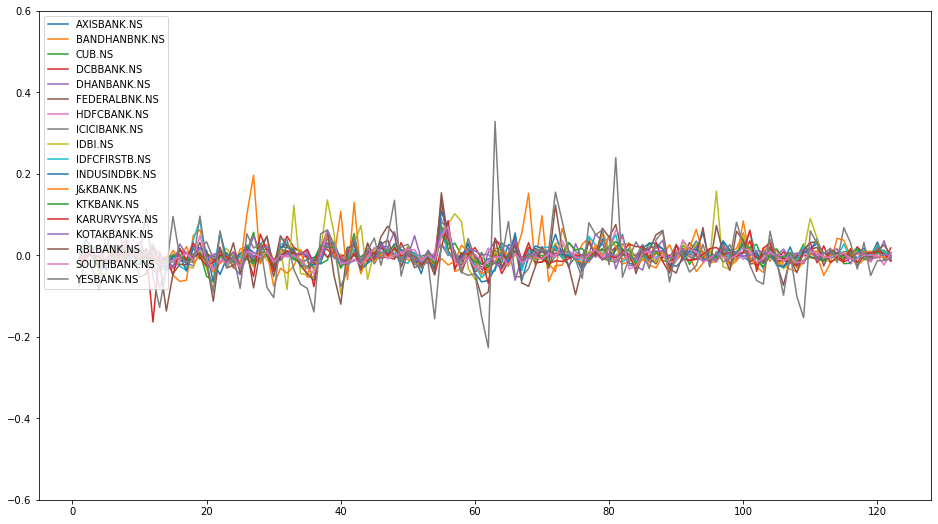

In [11]:
plt.figure(figsize = (16,9))
for ticker in private_bank_return_b.columns.values:
    plt.plot(private_bank_return_b.index, private_bank_return_b[ticker], label = ticker)
plt.ylim(-0.6,0.6)
plt.legend();

In [12]:
beta_coef = []
MES = []
for ticker in private_bank_return_b.columns.tolist():
    beta_coef.append(beta(nifty50_return_b, private_bank_return_b[ticker]))
    MES.append(mes(private_bank_return_b[ticker], nifty50_return_b))
private_b = {'Symbol':private_bank_return_b.columns.tolist(), 
            'Bank':bank_details[bank_details.Type == 'Private']['Name of the Bank'].tolist(),
            'Type':['Private' for i in range(private_bank_return_b.shape[1])],'Beta':beta_coef, 'MES':MES}
private_b = pd.DataFrame(private_b)
private_b

,Symbol,Bank,Type,Beta,MES
0,AXISBANK.NS,Axis Bank,Private,1.190164,0.005123
1,BANDHANBNK.NS,Bandhan Bank,Private,1.319250,0.010603
2,CUB.NS,City Union Bank,Private,0.640283,-0.002923
3,DCBBANK.NS,D C B Bank,Private,1.059757,-0.008319
4,DHANBANK.NS,Dhanlaxmi Bank,Private,0.481003,0.007493
5,FEDERALBNK.NS,Federal Bank,Private,1.502259,0.010602
6,HDFCBANK.NS,H D F C Bank,Private,1.067223,-0.003372
7,ICICIBANK.NS,I C I C I Bank,Private,1.329351,0.000284
8,IDBI.NS,I D B I Bank,Private,1.507037,0.020290
9,IDFCFIRSTB.NS,I D F C FIRST Bank,Private,1.050771,0.005936


## After Covid Outbreak

### Nifty50

In [13]:
# Getting data for Nifty50 returns
nifty50_a = get_data.DataReader(nifty50_symbol, 'yahoo', start = a_start_date, end = a_end_date, pause = 10)
nifty50_a.reset_index(drop = True, inplace = True)
nifty50_a = nifty50_a['Close']
nifty50_return_a = nifty50_a.pct_change().drop(index = 0)

### Public Bank

In [14]:
# Collecting data for public banks
public_bank_a = get_data.DataReader(public_banks_symbol, 'yahoo', start = a_start_date, end = a_end_date, pause = 10)
public_bank_a = public_bank_a['Close']
public_bank_a.reset_index(drop = True, inplace = True)
public_bank_return_a = public_bank_a.pct_change().drop(index = 0)
public_bank_return_a.head()

Symbols,SBIN.NS,PNB.NS,BANKBARODA.BO,BANKINDIA.NS,MAHABANK.BO,UNIONBANK.NS,CANBK.NS,CENTRALBK.NS,INDIANB.NS,IOB.NS,PSB.NS,UCOBANK.NS
1,0.014501,0.030912,0.025037,0.011356,0.000775,0.010999,0.032484,0.011142,0.014800,0.004504,0.046005,0.009009
2,-0.016504,-0.024738,-0.034004,-0.007719,-0.003870,-0.007253,-0.031462,0.000000,0.000000,-0.004484,0.050926,-0.011905
3,-0.044052,-0.056111,-0.050074,-0.029703,-0.031857,-0.032877,-0.064065,-0.016529,-0.026252,0.045045,-0.030837,-0.006024
4,-0.001881,0.007329,0.003131,-0.000729,0.000000,-0.004721,0.002892,0.005602,-0.005492,-0.025862,-0.018182,0.015152
5,0.004397,-0.016168,-0.008845,-0.010212,-0.016854,-0.014231,-0.001202,-0.011142,-0.014056,-0.017699,-0.020833,-0.023881


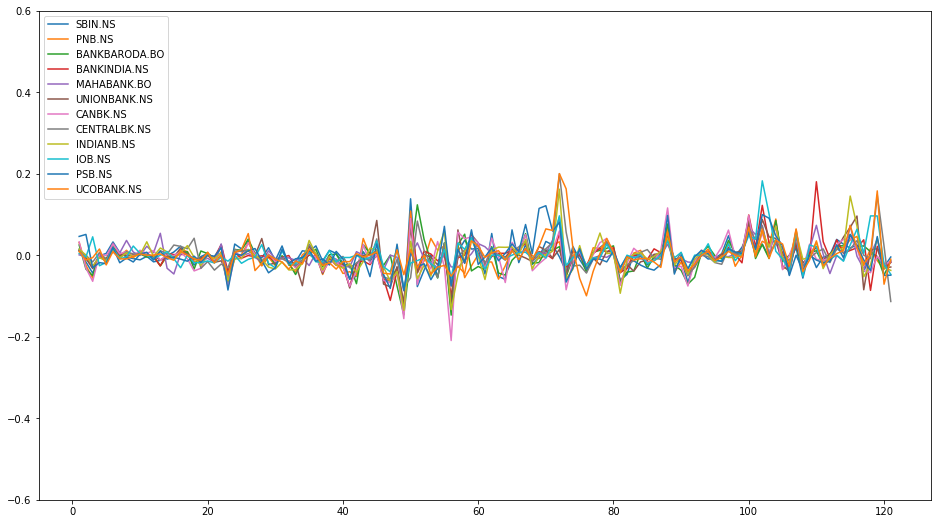

In [15]:
plt.figure(figsize = (16,9))
for ticker in public_bank_return_a.columns.values:
    plt.plot(public_bank_return_a.index, public_bank_return_a[ticker], label = ticker)
plt.ylim(-0.6, 0.6)
plt.legend();

In [16]:
beta_coef = []
MES = []
for ticker in public_bank_return_a.columns.tolist():
    beta_coef.append(beta(nifty50_return_a, public_bank_return_a[ticker]))
    MES.append(mes(public_bank_return_a[ticker], nifty50_return_a))
public_a = {'Symbol':public_bank_return_a.columns.tolist(), 
            'Bank':bank_details[bank_details.Type == 'Public']['Name of the Bank'].tolist(),
            'Type':['Public' for i in range(public_bank_return_a.shape[1])],'Beta':beta_coef, 'MES':MES}
public_a = pd.DataFrame(public_a)
public_a

,Symbol,Bank,Type,Beta,MES
0,SBIN.NS,State bank of India,Public,1.112973,-0.006464
1,PNB.NS,Punjab National Bank,Public,0.692102,-0.004240
2,BANKBARODA.BO,Bank of Baroda,Public,0.713227,0.001729
3,BANKINDIA.NS,Bank of India,Public,0.694962,-0.003955
4,MAHABANK.BO,Bank of Maharashtra,Public,0.333186,0.006939
5,UNIONBANK.NS,Union Bank of India,Public,0.779366,0.002058
6,CANBK.NS,Canara Bank,Public,1.218709,0.006606
7,CENTRALBK.NS,Central Bank of India,Public,0.471840,0.012817
8,INDIANB.NS,Indian Bank,Public,0.880300,-0.001004
9,IOB.NS,Indian Overseas Bank,Public,0.468190,0.003662


### Private Bank

In [17]:
# Collecting data for private banks
private_bank_a = get_data.DataReader(private_banks_symbol, 'yahoo', start = a_start_date, end = a_end_date, pause = 10)
private_bank_a = private_bank_a['Close']
private_bank_a.reset_index(drop = True, inplace = True)
private_bank_return_a = private_bank_a.pct_change().drop(index = 0)
private_bank_return_a.head()

Symbols,AXISBANK.NS,BANDHANBNK.NS,CUB.NS,DCBBANK.NS,DHANBANK.NS,FEDERALBNK.NS,HDFCBANK.NS,ICICIBANK.NS,IDBI.NS,IDFCFIRSTB.NS,INDUSINDBK.NS,J&KBANK.NS,KTKBANK.NS,KARURVYSYA.NS,KOTAKBANK.NS,RBLBANK.NS,SOUTHBANK.NS,YESBANK.NS
1,0.011019,-0.007952,-0.007281,0.039705,0.030928,0.039437,0.006374,0.007173,0.010782,0.007642,0.030115,0.005034,0.012422,0.004177,-0.001493,0.062078,0.004854,0.015005
2,-0.018495,0.014329,-0.014236,-0.004364,0.000000,-0.014092,-0.014261,-0.003237,-0.008000,-0.015168,-0.000098,-0.005008,0.011588,-0.005824,-0.008645,-0.032337,0.000000,-0.005280
3,-0.026516,-0.015904,-0.004158,0.002466,-0.050000,-0.042331,-0.021641,-0.024404,-0.041667,-0.039604,-0.038885,-0.023490,-0.030997,-0.053556,-0.002746,-0.058026,-0.019324,-0.041401
4,0.003457,-0.009536,0.001538,0.015578,0.010526,0.002870,0.015835,-0.005326,0.002805,-0.003436,-0.005274,0.000000,0.012517,-0.001768,0.011074,0.021226,0.014778,-0.002215
5,-0.001722,-0.017026,0.013164,0.014532,-0.006944,-0.004579,-0.002618,0.005833,-0.013986,-0.009195,-0.002087,0.001718,-0.006868,-0.019486,-0.009576,0.005814,-0.014563,0.022198


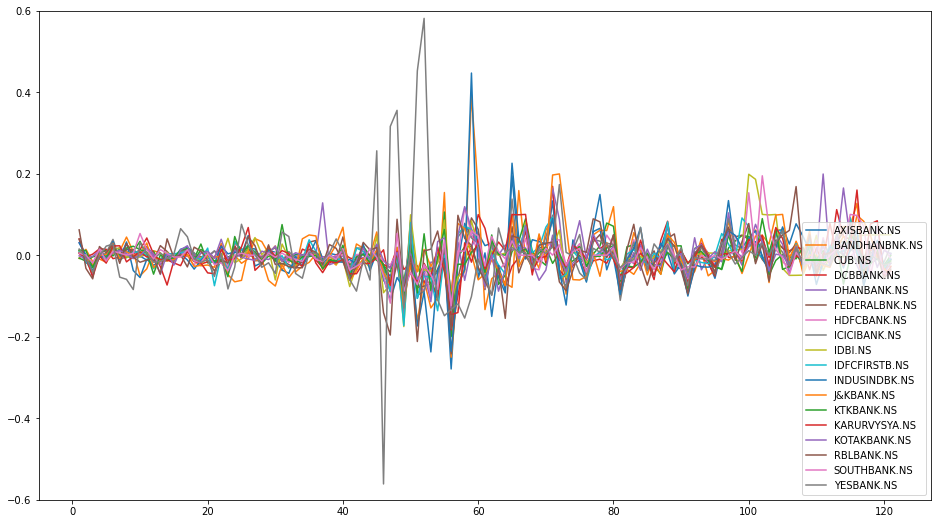

In [18]:
plt.figure(figsize = (16,9))
for ticker in private_bank_return_a.columns.values:
    plt.plot(private_bank_return_a.index, private_bank_return_a[ticker], label = ticker)
plt.ylim(-0.6,0.6)
plt.legend();

In [19]:
beta_coef = []
MES = []
for ticker in private_bank_return_a.columns.tolist():
    beta_coef.append(beta(nifty50_return_a, private_bank_return_a[ticker]))
    MES.append(mes(private_bank_return_a[ticker], nifty50_return_a))
private_a = {'Symbol':private_bank_return_a.columns.tolist(), 
            'Bank':bank_details[bank_details.Type == 'Private']['Name of the Bank'].tolist(),
            'Type':['Private' for i in range(private_bank_return_a.shape[1])],'Beta':beta_coef, 'MES':MES}
private_a = pd.DataFrame(private_a)
private_a

,Symbol,Bank,Type,Beta,MES
0,AXISBANK.NS,Axis Bank,Private,1.563499,0.002736
1,BANDHANBNK.NS,Bandhan Bank,Private,1.506583,-0.024718
2,CUB.NS,City Union Bank,Private,1.019470,-0.027504
3,DCBBANK.NS,D C B Bank,Private,0.725229,0.011829
4,DHANBANK.NS,Dhanlaxmi Bank,Private,0.834720,0.015049
5,FEDERALBNK.NS,Federal Bank,Private,1.326336,-0.001677
6,HDFCBANK.NS,H D F C Bank,Private,1.073192,-0.004293
7,ICICIBANK.NS,I C I C I Bank,Private,1.403511,0.001545
8,IDBI.NS,I D B I Bank,Private,0.959634,-0.014833
9,IDFCFIRSTB.NS,I D F C FIRST Bank,Private,1.201896,0.001269


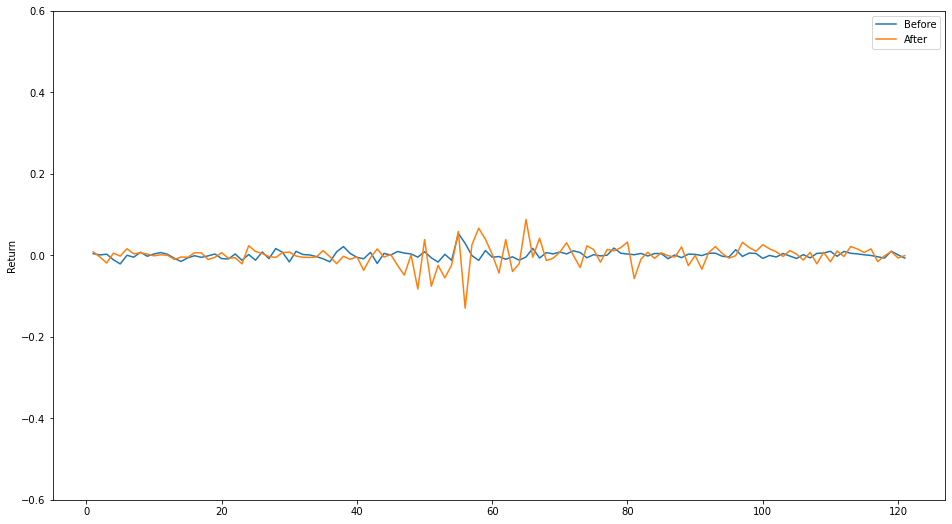

In [20]:
plt.figure(figsize = (16,9))
plt.plot(nifty50_return_b.index, nifty50_return_b, label = 'Before')
plt.plot(nifty50_return_a.index, nifty50_return_a, label = 'After')
plt.legend()
plt.ylim(-0.6,0.6)
plt.ylabel('Return');

## Saving necessary files

In [21]:
with pd.ExcelWriter('./../data/task1_output.xlsx') as writer:
    # Closing Prices
    public_bank_b.to_excel(writer, sheet_name = 'public_bank_b', index = False)
    public_bank_a.to_excel(writer, sheet_name = 'public_bank_a', index = False)
    private_bank_b.to_excel(writer, sheet_name = 'private_bank_b', index = False)
    private_bank_a.to_excel(writer, sheet_name = 'private_bank_a', index = False)
    # Daily Returns
    public_bank_return_b.to_excel(writer, sheet_name = 'public_bank_return_b', index = False)
    public_bank_return_a.to_excel(writer, sheet_name = 'public_bank_return_a', index = False)
    private_bank_return_b.to_excel(writer, sheet_name = 'private_bank_return_b', index = False)
    private_bank_return_a.to_excel(writer, sheet_name = 'private_bank_return_a', index = False)
    # Beta and MES
    public_b.to_excel(writer, sheet_name = 'public_b_result', index = False)
    public_a.to_excel(writer, sheet_name = 'public_a_result', index = False)
    private_b.to_excel(writer, sheet_name = 'private_b_result', index = False)
    private_a.to_excel(writer, sheet_name = 'private_a_result', index = False)